<a href="https://colab.research.google.com/github/ValentinooooMayoraaaal/Machine-Learning-Heart-Disease/blob/main/Bienvenue_dans_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenue dans Colab !

--- Initial Exploration ---
Preview of the first 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0   

General information (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   

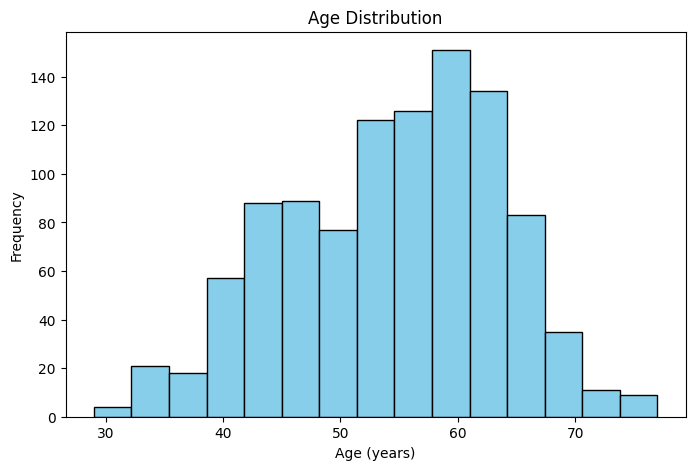

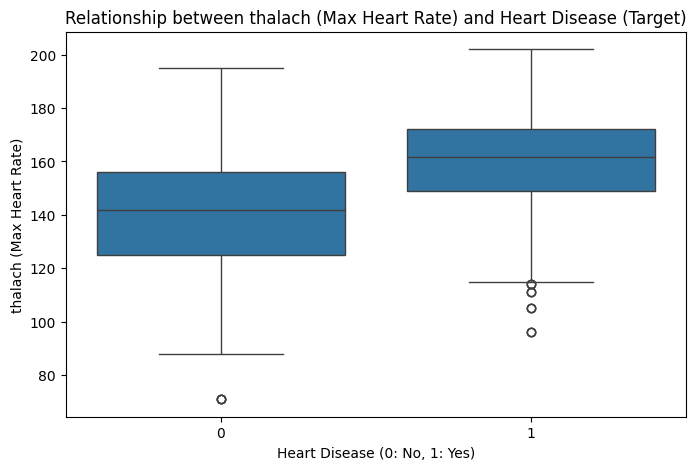

--- Data Preprocessing ---

--- Final Data Dimensions ---
Dimensions of Feature Matrix (X): (1025, 19)
Dimensions of Target Vector (y): (1025,)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/heart.csv")

print("--- Initial Exploration ---")
print("Preview of the first 5 rows:")
print(df.head(), "\n")

print("General information (data types and non-null counts):")
print(df.info(), "\n")

print("Descriptive statistics:")
print(df.describe(), "\n")

print("--- Data Visualization ---")

plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Relationship between thalach (Max Heart Rate) and Heart Disease (Target)")
plt.xlabel("Heart Disease (0: No, 1: Yes)")
plt.ylabel("thalach (Max Heart Rate)")
plt.show()


print("--- Data Preprocessing ---")

for col in ['ca', 'thal']:

    df[col] = pd.to_numeric(df[col], errors='coerce')

imputer = SimpleImputer(strategy='most_frequent')

df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])

categorical_cols_to_encode = ['cp', 'restecg', 'slope', 'thal']

df = pd.get_dummies(
    df,
    columns=categorical_cols_to_encode,

    drop_first=True
)


scaler = StandardScaler()

numerical_cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

X = df.drop('target', axis=1)
y = df['target']

print("\n--- Final Data Dimensions ---")
print("Dimensions of Feature Matrix (X):", X.shape)
print("Dimensions of Target Vector (y):", y.shape)


--- 3.1 Logistic Regression (Tuning) ---
Best LR parameters: {'C': np.float64(1.623776739188721), 'penalty': 'l2'}

--- 3.2 Decision Tree (Tuning) ---
Best DT parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}

--- 3.3 Random Forest (Tuning) ---
Best RF parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


MODEL EVALUATION: Logistic Regression

--- Evaluation Report ---
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205


Confusion Matrix (Actual vs Predicted):


,Pred 0,Pred 1
Actual 0,84,16
Actual 1,10,95



Metrics Summary: {'Accuracy': 0.8731707317073171, 'Precision': 0.8558558558558559, 'Recall': 0.9047619047619048, 'F1-Score': 0.8796296296296297, 'AUC-ROC': np.float64(0.944857142857143)}


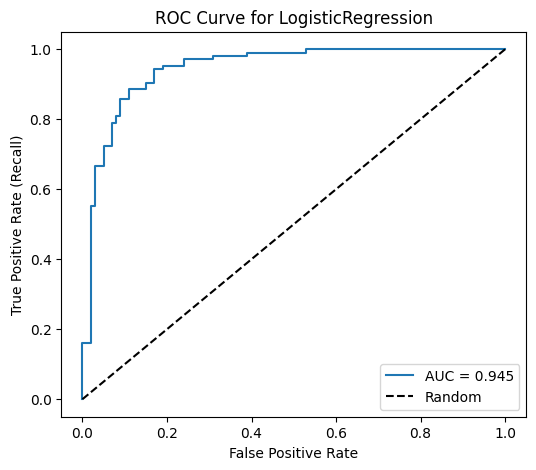



MODEL EVALUATION: Decision Tree

--- Evaluation Report ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix (Actual vs Predicted):


,Pred 0,Pred 1
Actual 0,98,2
Actual 1,0,105



Metrics Summary: {'Accuracy': 0.9902439024390244, 'Precision': 0.9813084112149533, 'Recall': 1.0, 'F1-Score': 0.9905660377358491, 'AUC-ROC': np.float64(0.9995238095238095)}


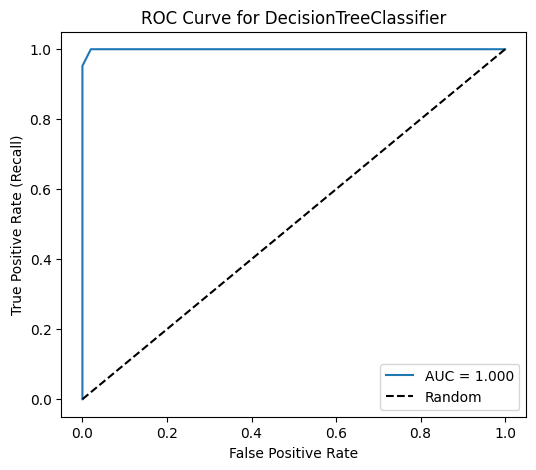



MODEL EVALUATION: Random Forest

--- Evaluation Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix (Actual vs Predicted):


,Pred 0,Pred 1
Actual 0,100,0
Actual 1,0,105



Metrics Summary: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'AUC-ROC': np.float64(1.0)}


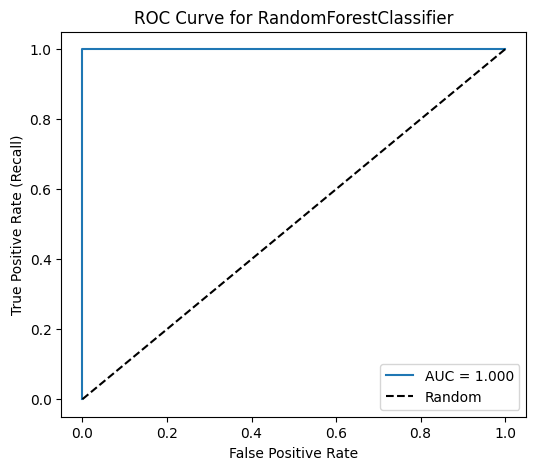



SUMMARY AND COMPARISON OF RESULTS (Test Set)


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Model,,,,,
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
Decision Tree,0.990244,0.981308,1.000000,0.990566,0.999524
Logistic Regression,0.873171,0.855856,0.904762,0.879630,0.944857



-> The best mode based o n the F1-Score is: Random Forest


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from IPython.display import display

# Load dataset
df = pd.read_csv('heart.csv')
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = df.dropna()
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop('target', axis=1)
y = df['target']

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


def evaluate_model(model, X_test, y_test):
    """Compute and display classification metrics for a model."""

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

    print("\n--- Evaluation Report ---")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix (Actual vs Predicted):")
    cm = confusion_matrix(y_test, y_pred)
    display(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Pred 0', 'Pred 1']))

    print(f"\nMetrics Summary: {metrics}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {metrics["AUC-ROC"]:.3f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title(f'ROC Curve for {model.best_estimator_.__class__.__name__}')
    plt.legend()
    plt.show()

    return metrics


best_models = {}

print("\n--- 3.1 Logistic Regression (Tuning) ---")
param_grid_lr = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l2']
}

grid_search_lr = GridSearchCV(
    LogisticRegression(solver='liblinear', random_state=42),
    param_grid_lr, cv=5, scoring='recall'
)
grid_search_lr.fit(X_train, y_train)
best_models['Logistic Regression'] = grid_search_lr
print(f"Best LR parameters: {grid_search_lr.best_params_}")



print("\n--- 3.2 Decision Tree (Tuning) ---")
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt, cv=5, scoring='recall'
)
grid_search_dt.fit(X_train, y_train)
best_models['Decision Tree'] = grid_search_dt
print(f"Best DT parameters: {grid_search_dt.best_params_}")

print("\n--- 3.3 Random Forest (Tuning) ---")
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf, cv=5, scoring='recall', n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)
best_models['Random Forest'] = grid_search_rf
print(f"Best RF parameters: {grid_search_rf.best_params_}")

results = {}

for name, model_gs in best_models.items():
    print("\n\n============================================")
    print(f"MODEL EVALUATION: {name}")
    print("==========================")
    results[name] = evaluate_model(model_gs, X_test, y_test)

print("\n\n" + "="*50)
print("SUMMARY AND COMPARISON OF RESULTS (Test Set)")
print("="*50)

comparison_df = pd.DataFrame(results).T
comparison_df.index.name = 'Model'
display(comparison_df.sort_values(by='F1-Score', ascending=False))

best_model_name = comparison_df['F1-Score'].idxmax()
print(f"\n-> The best mode based o n the F1-Score is: {best_model_name}")